# Demo Scenario 0

> Tutorial notebook for constructing your own GPT Function calling ecosystem

The goal of this demo is to demonstrate the scalability and adaptability of GPT Function calling framework.

The scenario of this demo is a user wanting to build an application / service with custom functions. In a normal development flow, the user must start with the primitive utilities, then manually code and link each function together to ensure they work in sequence. This can be a tedious process, especially as the complexity of the application grows and third-party services are involved.

With our application, the process is simplified. The GPT Function Calling framework allows the user to easily chain and combine custom functions through simple, natural language instructions. Instead of manually coding each function’s integration, the user can focus on defining high-level tasks, while GPT FC handles the technical complexities of connecting, sequencing, and executing the functions. Additionally, our `llmcam.core` utilities also help streamline the process by providing a set of pre-built functions that prepare and execute GPT FC.

In this case, suppose the user wants to create a service that capture images from Youtube with the provided locations and providers.

In [ ]:
#| hide
from nbdev.showdoc import *

## Step 1 - Preparation

First, we define the primitive Python function that handles a specific task - to provide a Youtube Live URL based on location and provider, and build it to a GPT-compatible tool.

The main tasks in this step include:

- Import necessary modules from `llmcam.core`.  
- Define the primitive function.  
- Appropriately document the primitive function.  
- Generate the tool schema from function.  
- (Optional) Edit tool schema.  

In [ ]:
#| eval: false
# Import necessary modules from `llmcam.core` package
from llmcam.core.fc import *
from llmcam.core.fn_to_schema import *

In [ ]:
#| eval: false
# Define the function for selecting Youtube Live URL
def select_youtube_live_url(location, provider):
    if "santa" in location.lower():
        return "https://www.youtube.com/watch?v=Cp4RRAEgpeU"
    if "parking" in location.lower():
        return "https://www.youtube.com/watch?v=mwN6l3O1MNI"
    else:
        return "https://www.youtube.com/watch?v=LMZQ7eFhm58"

In [ ]:
#| eval: false
# Add documentation to the function:
    # - Add an overall description of the function
    # - Add type hints for the input parameters
    # - Add descriptions for the input parameters (inline comments)
from typing import Optional

def select_youtube_live_url(
    location: str,  # Location of the Youtube Live URL
    provider: Optional[str] = "Youtube"  # Provider of the Youtube Live URL
) -> str:
    """Select Youtube Live URL based on the location and provider."""
    if "santa" in location.lower():
        return "https://www.youtube.com/watch?v=Cp4RRAEgpeU"
    if "parking" in location.lower():
        return "https://www.youtube.com/watch?v=mwN6l3O1MNI"
    else:
        return "https://www.youtube.com/watch?v=LMZQ7eFhm58"

In [ ]:
#| eval: false
# Create a schema for the function
schema = function_schema(select_youtube_live_url, "youtube_live")
schema

{'type': 'function',
 'function': {'name': 'select_youtube_live_url',
  'description': 'Select Youtube Live URL based on the location and provider.',
  'parameters': {'type': 'object',
   'properties': {'location': {'type': 'string',
     'description': 'Location of the Youtube Live URL'},
    'provider': {'anyOf': [{'type': 'string',
       'description': 'Provider of the Youtube Live URL'},
      {'type': 'null',
       'description': 'A default value will be automatically used.'}]}},
   'required': ['location']},
  'metadata': {'module': '__main__', 'service': 'youtube_live'}}}

In [ ]:
#| eval: false
# Edit the schema to add more details
schema["function"]["parameters"]["properties"]["location"]["description"] = "Location of the Youtube Live URL. \
Possible values are 'Santa' for Santa Claus Village, 'Parking' for Parking lots, or any other location."

## Step 2 - Integrate function into GPT Function calling

We can start integrating this function into GPT FC for our application. This step involves:

- Set up initial `tools` list and add this function as a built-in tool.  
- Verify by asking about available tools.  
- Verify by executing the function.  

In [ ]:
#| eval: false
# Set up `tools` list and add `schema` to it
tools = []
tools.append(schema)

In [ ]:
#| eval: false
# Start the conversation and verify the tools
messages = form_msgs([
    ("system", "You are a helpful system administrator. Use the supplied tools to help the user."),
    ("user", "What tools can you use?")
])
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
I can use the following tools:  1. **Select Youtube Live URL**: This tool allows you to select a
Youtube Live URL based on the location (such as 'Santa', 'Parking', or any other location) and
optionally filter by a specific provider.  2. **Multi Tool Use (Parallel Execution)**: This tool
allows me to execute multiple functions simultaneously, but only if they can operate in parallel.
These tools help in accessing specific Youtube Live URLs based on defined criteria. Let me know how
I can assist you using these tools!


In [ ]:
#| eval: false
# Ask the user for a Youtube Live URL
messages.append(form_msg("user", "Can you provide me with a Youtube Live URL from Santa Claus Village?"))
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
Here is a Youtube Live URL from Santa Claus Village: [Watch
Live](https://www.youtube.com/watch?v=Cp4RRAEgpeU). Enjoy the view!


## Step 3 - Integrate with any other tools

To demonstrate the scalability of this system, we can extend the tools list by some of `llmcam.vision` built-in functions. This step include:

- Import function to capture image from a Youtube Live `llmcam.vision.ytlive`.  
- Generate and add its schema to the `tools` list.  
- Test integration and chain the primitive functions with a command to capture image from some locations.  

In [ ]:
#| eval: false
from llmcam.vision.ytlive import capture_youtube_live_frame

In [ ]:
#| eval: false
tools.append(function_schema(capture_youtube_live_frame, "youtube_live"))
len(tools)

2

In [ ]:
#| eval: false
# Ask GPT to capture a frame from the a known location
messages.append(form_msg(
    "user", 
    "Can you capture a frame from the Youtube Live URL of Santa Claus Village? \
Tell me the file path of the captured frame."
))
complete(messages, tools=tools)
print_msg(messages[-1])

[youtube] Extracting URL: https://www.youtube.com/watch?v=Cp4RRAEgpeU
[youtube] Cp4RRAEgpeU: Downloading webpage
[youtube] Cp4RRAEgpeU: Downloading ios player API JSON
[youtube] Cp4RRAEgpeU: Downloading mweb player API JSON
[youtube] Cp4RRAEgpeU: Downloading m3u8 information
[youtube] Cp4RRAEgpeU: Downloading m3u8 information
>> Assistant:
I have captured a frame from the Youtube Live stream of Santa Claus Village. The image has been
saved at the following file path:
`/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.20_05:54:54_Santa.jpg`.


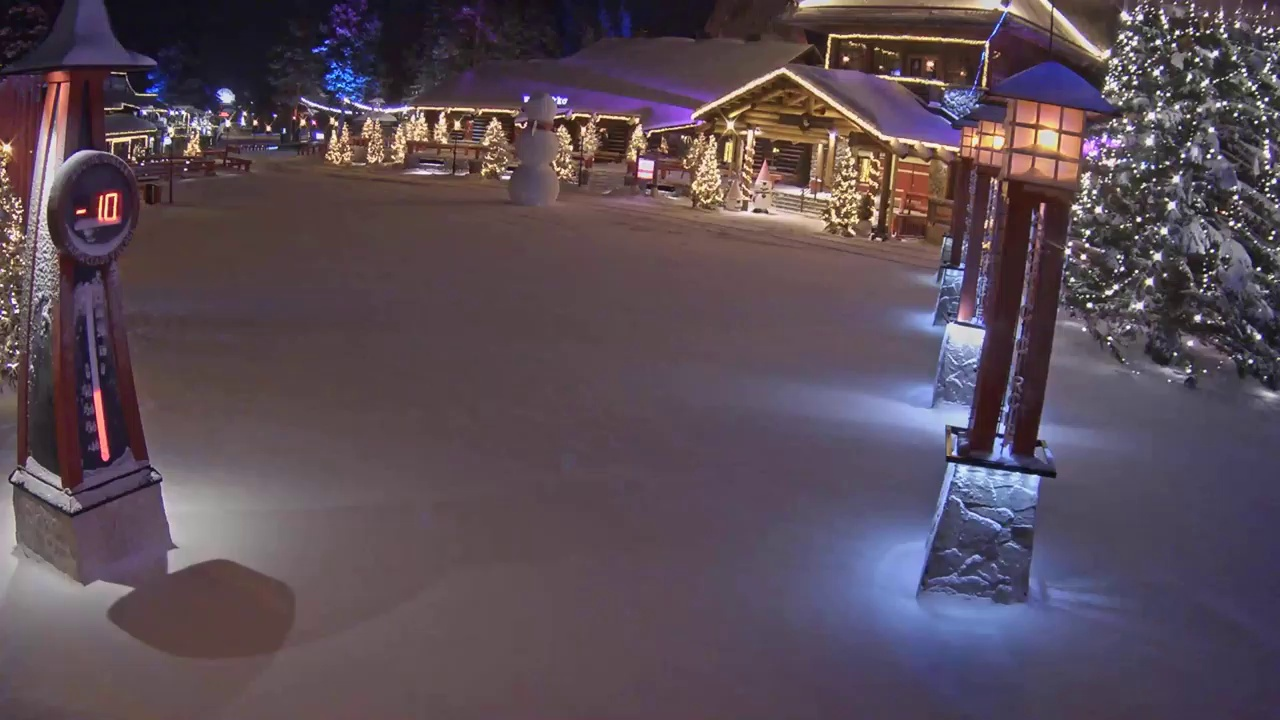

In [ ]:
#| eval: false
# Display the captured image
from IPython.display import Image
Image("/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.20_05:54:54_Santa.jpg")

As such, GPT FC has successfully built a higher-level function of capturing an image from a location from two primitive functions. For examples of constructing built-in functions or more complex frameworks, refer to our modules in `llmcam.vision` and `llmcam.utils`. For a full application, test our chatbot website on `http://llmcam.ninjalabo.ai/` or run it locally with `llmcam.application.runner.run_llmcam`. 

## **CONVERSATION TRANSCRIPT**

In [ ]:
#| eval: false
print_msgs(messages)

>> System:
You are a helpful system administrator. Use the supplied tools to help the user.
>> User:
What tools can you use?
>> Assistant:
I can use the following tools:  1. **Select Youtube Live URL**: This tool allows you to select a
Youtube Live URL based on the location (such as 'Santa', 'Parking', or any other location) and
optionally filter by a specific provider.  2. **Multi Tool Use (Parallel Execution)**: This tool
allows me to execute multiple functions simultaneously, but only if they can operate in parallel.
These tools help in accessing specific Youtube Live URLs based on defined criteria. Let me know how
I can assist you using these tools!
>> User:
Can you provide me with a Youtube Live URL from Santa Claus Village?
>> Assistant:
Here is a Youtube Live URL from Santa Claus Village: [Watch
Live](https://www.youtube.com/watch?v=Cp4RRAEgpeU). Enjoy the view!
>> User:
Can you capture a frame from the Youtube Live URL of Santa Claus Village? Tell me the file path of
the captur